PCA – Cumulative Explained Variance
Bu grafik, PCA sonrası her bileşenin kümülatif varyansa katkısını gösterir.
Kırmızı çizgi %90 varyans eşiğini belirtir.
Bu eşiğe ulaşmak için gereken bileşen sayısı: {required_components}.

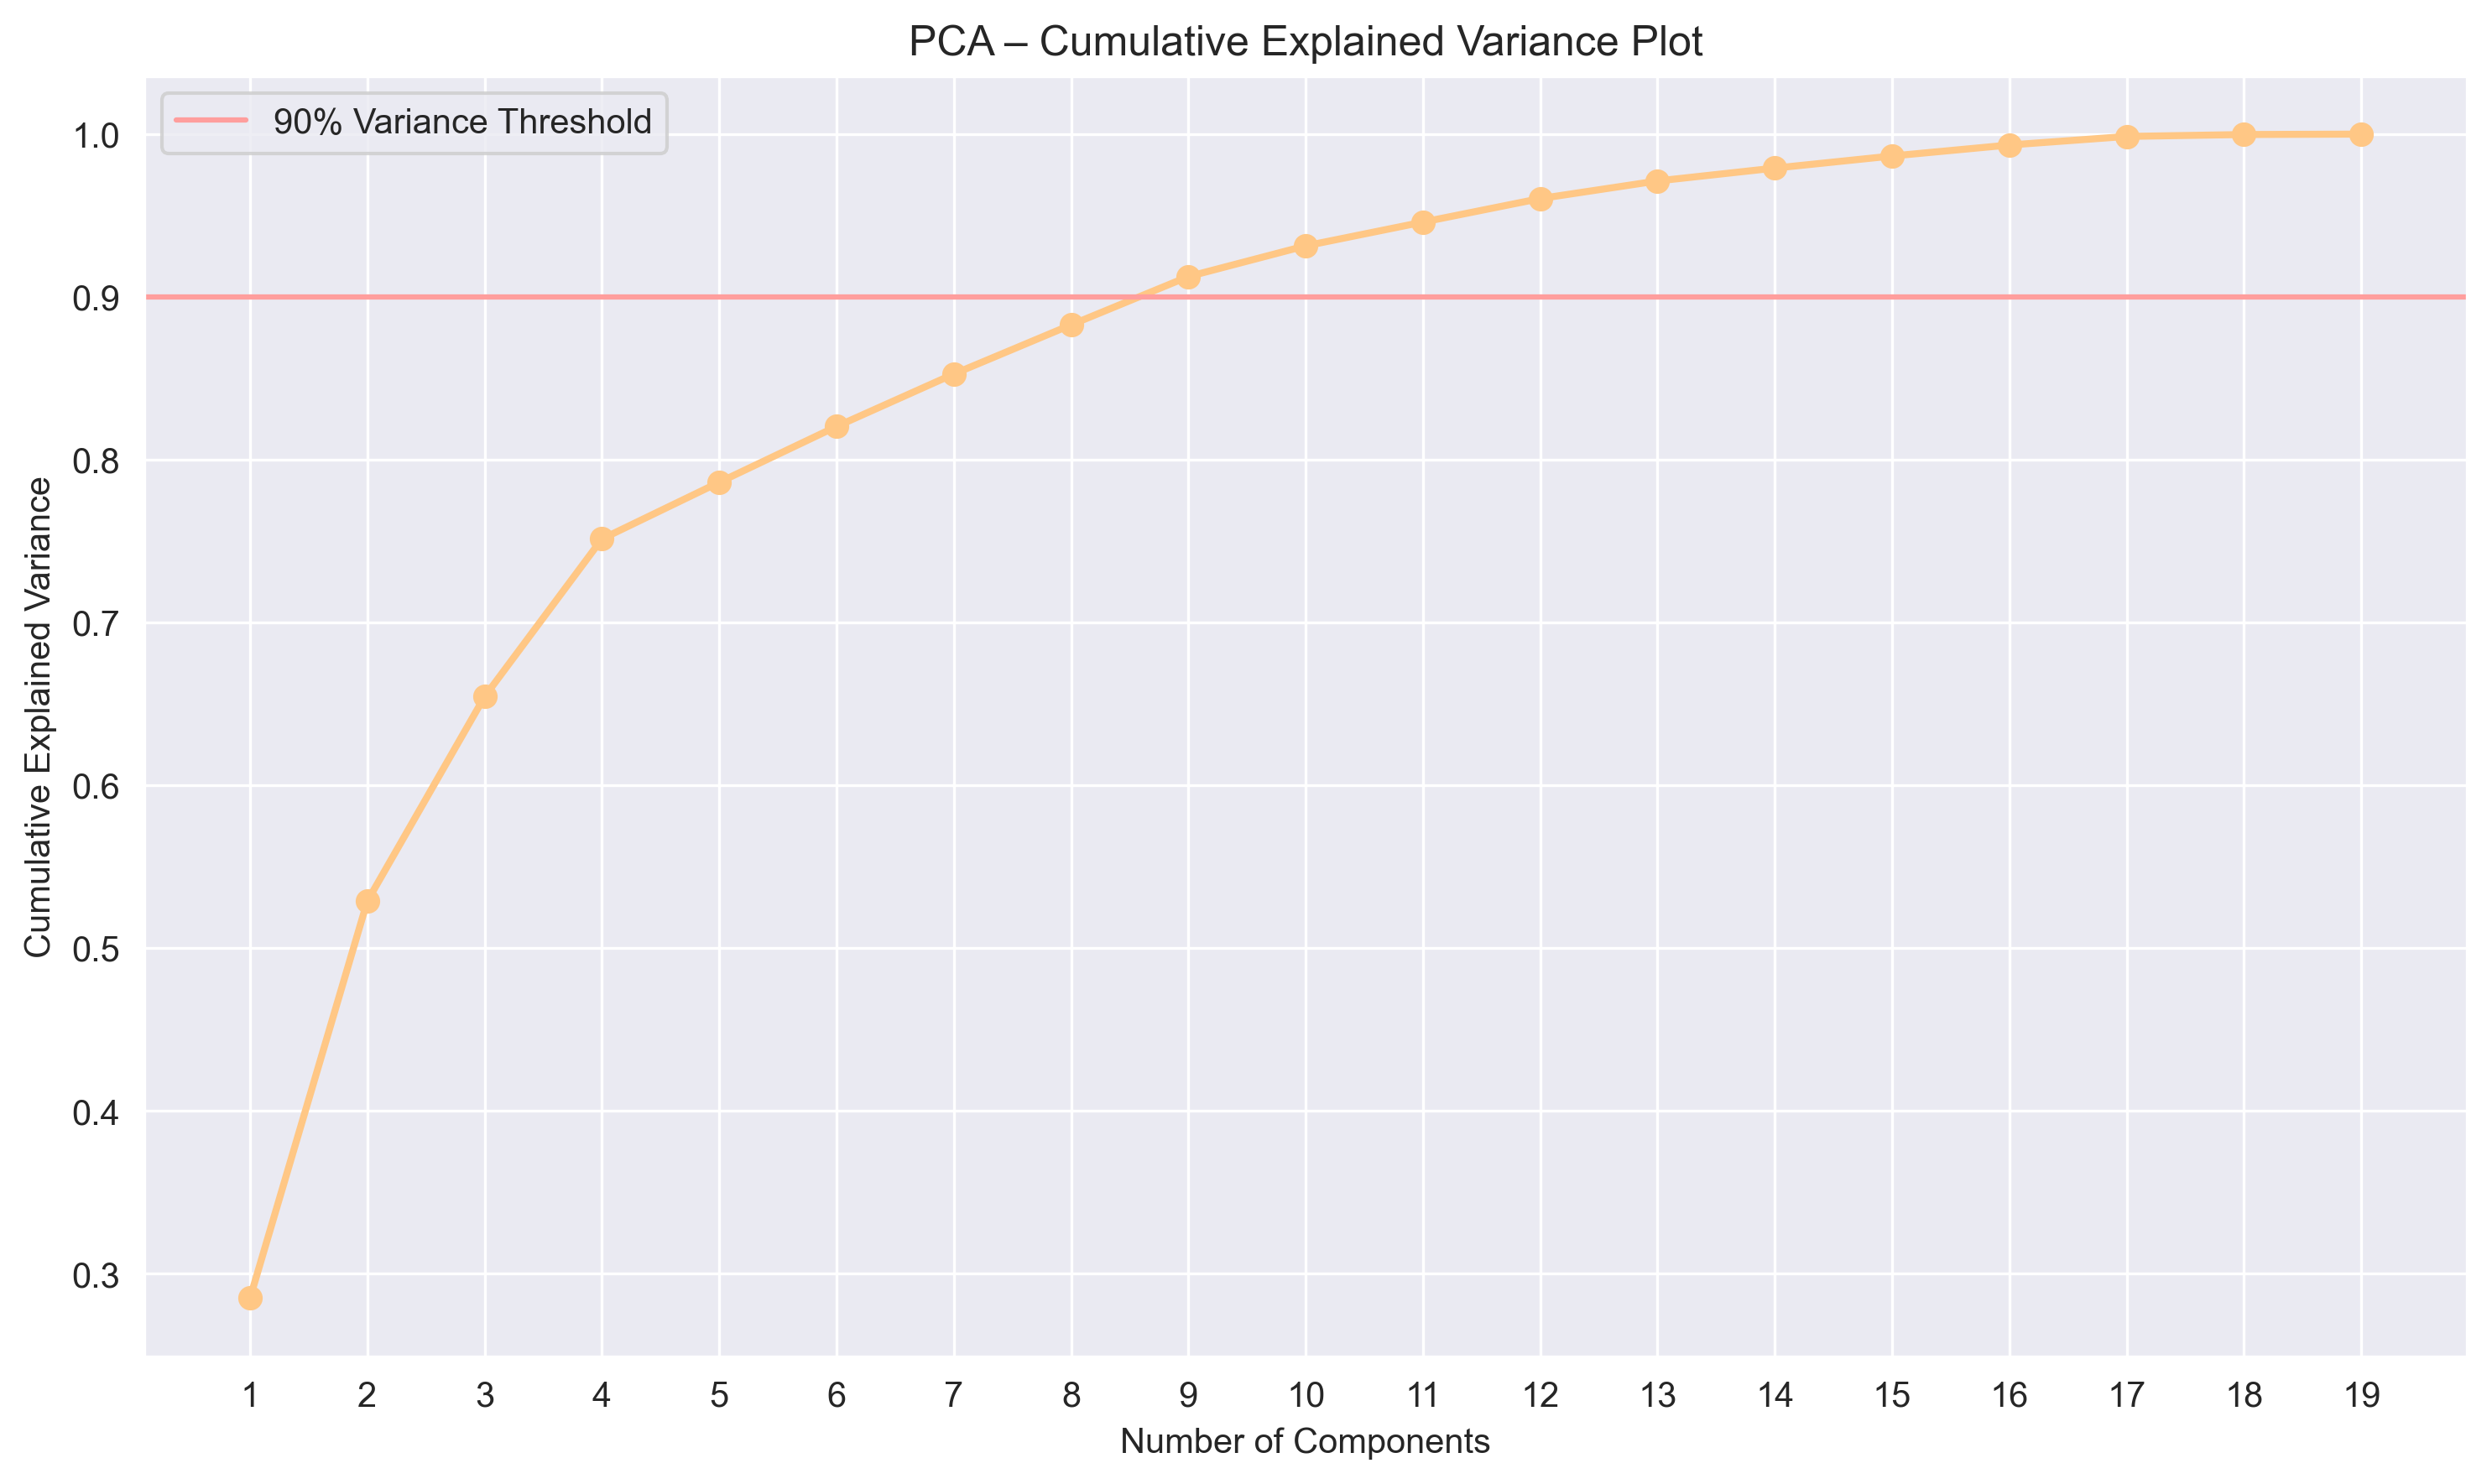

Number of components required to retain 90% variance: 9


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

color1 = '#FF9E9D'  # Coral Pink
color2 = '#FFC785'  # Peach
color3 = '#FFF59D'  # Light Lemon
color4 = '#A0E6A6'  # Mint Green
color5 = '#87C8FF'  # Sky Blue
color6 = '#C4A2FF'  # Lavender

# Load the normalized dataset
df_normalized = pd.read_csv("../datasets/customer_shopping_data_v20.csv")

# Fit PCA without limiting components
pca = PCA().fit(df_normalized)
explained_var = pca.explained_variance_ratio_
cumulative_var = explained_var.cumsum()

# Plot cumulative explained variance
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker='o', color=color2, linewidth=2)
plt.axhline(y=0.90, color=color1, label="90% Variance Threshold")
plt.xticks(range(1, len(cumulative_var) + 1))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA – Cumulative Explained Variance Plot")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("dataset_pca_figures/pca_explained_variance.png", dpi=300)
plt.show()

# Print number of components required for 90% explained variance
required_components = (cumulative_var >= 0.90).argmax() + 1
print(f"Number of components required to retain 90% variance: {required_components}")


PCA – Dimensionality Reduction
Veri kümesi, varyansın %90’ını koruyacak şekilde 9 bileşenli PCA ile dönüştürüldü.
Yeni özellikler PC1–PC9 olarak adlandırıldı ve v21 olarak dışa aktarıldı.

In [7]:
import pandas as pd
from sklearn.decomposition import PCA

# Load normalized data
df_normalized = pd.read_csv("../datasets/customer_shopping_data_v20.csv")

# Apply PCA with 9 components
pca = PCA(n_components=9)
X_pca = pca.fit_transform(df_normalized)

# Export as v21
pca_columns = [f"PC{i+1}" for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)
df_pca.to_csv("../datasets/customer_shopping_data_v21.csv", index=False)
